In [511]:
# -*- coding: utf-8 -*
import twitter
import csv
import json
import re
import requests
import lxml.html as html
from urllib2 import urlopen
import pandas as pd
from datetime import datetime, timedelta
from dateutil import tz
import time
import sklearn.cross_validation as cv
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [512]:
PREPARED_CSV = "prepared_to_analys.csv"
df = pd.read_csv(PREPARED_CSV, sep=",")

In [513]:
# Удаляем лишние столбцы
major_features = ["url", "week_day_news", "minutes_since_midnight", "first_time_tweet","follower_sum", "retweeted_count_sum", "favorite_count_sum", "user_listed_count_sum", "last_time_tweet"]
df = df[major_features]

In [514]:
# С глубоким прискорбием удаляем NA - если ничего не было, пока не будем будмать, что могло быть
df = df.drop_duplicates().dropna()

In [515]:
# В итоге имеем:
len(df)

97

In [516]:
df.head(90)

,url,week_day_news,minutes_since_midnight,first_time_tweet,follower_sum,retweeted_count_sum,favorite_count_sum,user_listed_count_sum,last_time_tweet
0,https://tjournal.ru/p/racist-comments-on-billb...,1,1240,20,1002026,92,172,4800,80
144,https://tjournal.ru/p/putin-hazanov-crown,1,1119,28,1000786,76,84,4732,60
228,https://tjournal.ru/p/papa-rap,1,1118,60,1268558,284,492,6796,224
504,https://tjournal.ru/p/pirelli-2016,1,989,12,999354,56,160,4684,72
612,https://tjournal.ru/p/ofcom-christmas-lights-wifi,1,918,8,999162,20,44,4760,32
644,https://tjournal.ru/p/room-in-room,1,881,16,1074200,24,12,5980,48
696,https://tjournal.ru/p/iphone7-usb-c,1,711,16,999742,28,68,4872,40
744,https://tjournal.ru/p/wiki-ai-edits,1,700,4,997798,44,28,4664,44
792,https://tjournal.ru/p/anastasia-emirates-airline,1,653,12,199336,0,0,9016,80
1064,https://tjournal.ru/p/rutracker-uchenia,0,1290,52,1027796,152,132,5520,124


In [517]:
x = df[df.columns[1:-1]].as_matrix()
y = df[df.columns[-1]].as_matrix()

In [518]:
# Делим данные
x_train, x_test, y_train, y_test = cv.train_test_split(x, y, test_size=0.2)

In [519]:
print "Коэффициенты корреляции Y:"
for i in range(len(major_features)-2):
    print major_features[i+1], "=", np.corrcoef(x[:,i], y)[0][1]

Коэффициенты корреляции Y:
week_day_news = -0.160728412624
minutes_since_midnight = -0.110238730238
first_time_tweet = 0.629138214261
follower_sum = 0.618623176192
retweeted_count_sum = 0.585617974304
favorite_count_sum = 0.630650271418
user_listed_count_sum = 0.354102575038


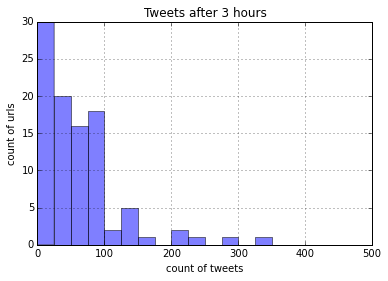

In [520]:
df.last_time_tweet.hist(alpha=0.5, bins=[i*25 for i in range(20)])
plt.title("Tweets after 3 hours")
plt.ylabel("count of urls")
plt.xlabel("count of tweets")
plt.show()

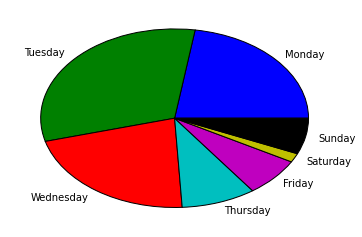

In [521]:
#df.week_day_news.hist(alpha=0.5, bins=[i for i in range(7)])
S = df.groupby("week_day_news")["last_time_tweet"].sum()
plt.pie(S.as_matrix(), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]);
plt.show();

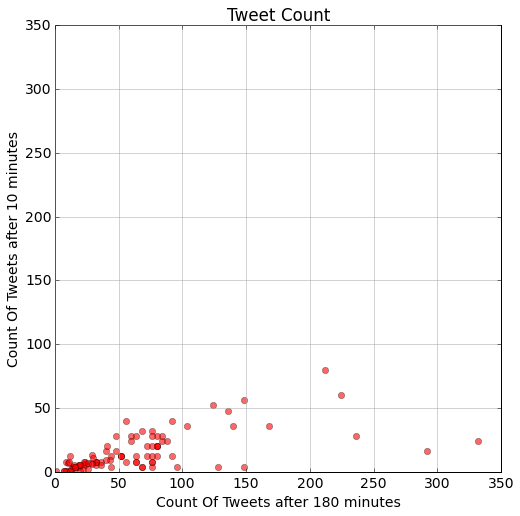

In [522]:
plt.figure(figsize=(8,8))
plt.plot(df["last_time_tweet"].as_matrix(), df["first_time_tweet"].as_matrix(), 'ro',  alpha=0.6)
plt.title("Tweet Count")
plt.xlabel("Count Of Tweets after 180 minutes")
plt.ylabel("Count Of Tweets after 10 minutes")
plt.xlim(0, 350)
plt.ylim(0, 350)
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.rcParams.update({'font.size': 14})

In [523]:
df[df["first_time_tweet"]> 25][["first_time_tweet", "last_time_tweet"]]

,first_time_tweet,last_time_tweet
144,28,60
228,60,224
1064,52,124
1244,48,136
1660,36,168
2328,36,140
2672,28,236
3624,28,48
3704,32,76
4840,32,68


In [524]:
df[df["last_time_tweet"]> 120][["first_time_tweet", "last_time_tweet"]]

,first_time_tweet,last_time_tweet
228,60,224
1064,52,124
1244,48,136
1660,36,168
1900,4,128
2328,36,140
2672,28,236
5700,56,148
6528,24,332
7668,16,292


In [525]:
def plot(y_test, y_predicted,title="", text=""):
    plt.figure(figsize=(9,9))
    plt.plot(y_test, y_predicted, 'ro', label="predicted", alpha=0.7)
    plt.title(title)
    plt.xlabel("Y_TEST")
    plt.ylabel("Y_PREDICTED")
    
    max_y = max(max(y_true), max(y_predicted))+10
    
    plt.xlim(0, max_y)
    plt.ylim(0, max_y)
    #plt.legend()
    plt.text(0.05*max_y, max_y-0.05*max_y, "mse="+text, fontsize=15)
    
    plt.plot([0, max_y], [0, max_y], color='black', alpha=0.5)
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    
    plt.show()

In [526]:
def split_data(train_index, test_index):
    x_train = x[train_index]
    y_train = y[train_index]
    
    x_test = x[test_index]
    y_test = y[test_index]
    
    return x_train, x_test, y_train, y_test

In [527]:
loo = cv.LeaveOneOut(len(y))

## Деревья

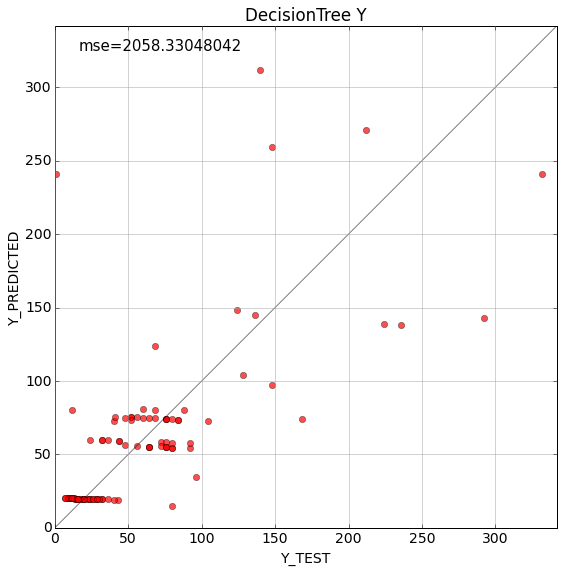

In [528]:
from sklearn.tree import DecisionTreeRegressor

y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    dtree = DecisionTreeRegressor(max_depth=3)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test[0])
    y_predicted.append(y_pred[0])
    y_true.append(y_test[0])
    

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="DecisionTree Y", text=str(mse))

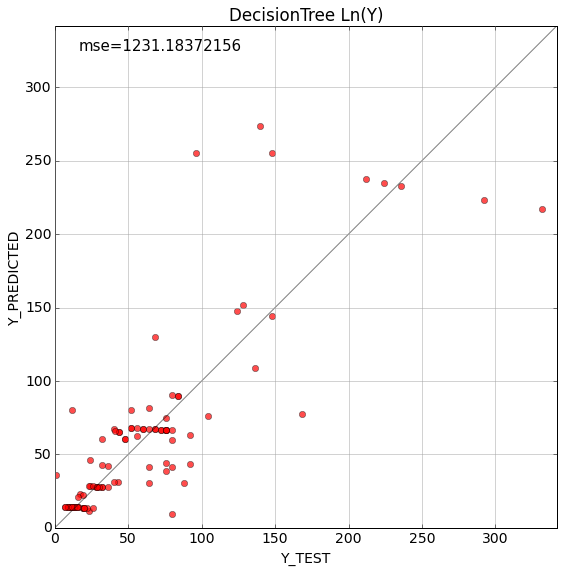

In [529]:
from sklearn.tree import DecisionTreeRegressor

y_predicted = []
y_true = []


for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    dtree = DecisionTreeRegressor(max_depth=4)
    dtree.fit(x_train, np.log(y_train))
    y_pred = dtree.predict(x_test[0])
    y_predicted.append(np.exp(y_pred[0]))
    y_true.append(y_test[0])

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="DecisionTree Ln(Y)", text=str(mse))

В целом, конечно, дерево решений работает плохо, но выбросы оно вполне себе улавливает

In [530]:
y_true = np.asarray(y_true)
y_predicted = np.asarray(y_predicted)
BIG = 100
y_big_true = y_true[y_true>BIG]
y_big_predicted = y_predicted[y_true>BIG]

In [531]:
a = pd.DataFrame([y_big_true, y_big_predicted])
a.index=["y_true","y_predicted"]
a

,0,1,2,3,4,5,6,7,8,9,10,11,12
y_true,224.000000,124.000000,136.000000,168.000000,128.00000,140.000000,236.000000,148.000000,332.000000,104.000000,292.000000,212.000000,148.000000
y_predicted,235.074815,147.505932,109.105454,77.545763,151.55363,273.916966,232.634063,255.389691,217.284171,76.282649,222.935452,237.677754,144.393983


Вопрос к Михаилу.

Как замерять RandomForest и другие рандомные методы. Раз через раз дает катастрофическую разницу. 400!

In [532]:
df.reset_index(inplace=True)

In [533]:
predic = pd.Series(np.around(y_predicted))

In [534]:
df["DT_Predict"]=predic
df_LTT = df[["url", "last_time_tweet", "DT_Predict"]]
df_LTT[df_LTT["last_time_tweet"]>70]

,url,last_time_tweet,DT_Predict
0,https://tjournal.ru/p/racist-comments-on-billb...,80,91
2,https://tjournal.ru/p/papa-rap,224,235
3,https://tjournal.ru/p/pirelli-2016,72,67
8,https://tjournal.ru/p/anastasia-emirates-airline,80,9
9,https://tjournal.ru/p/rutracker-uchenia,124,148
10,https://tjournal.ru/p/igil-to-daesh,136,109
13,https://tjournal.ru/p/telegram-music-bot,168,78
14,https://tjournal.ru/p/strange-presentations,128,152
16,https://tjournal.ru/p/wordseye,140,274
18,https://tjournal.ru/p/rkn-no-enemy-of-the-state,236,233


### LinearRegression

In [535]:
from sklearn.linear_model import Ridge

Подбираем параметр

In [536]:
alpha = [0.01, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 2e5, 4e5, 8e5, 1e6, 2e6, 4e6, 7e6, 1e7, 1e8]

mse = []
for al in alpha:
    y_predicted = []
    y_true = []

    for train_index, test_index in loo:
        x_train, x_test, y_train, y_test = split_data(train_index, test_index)
        model = Ridge(alpha=al)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test[0])
        y_predicted.append(y_pred[0])
        y_true.append(y_test[0])
    
    cur_mse = mean_squared_error(y_true, y_predicted)
    print cur_mse
    mse.append(cur_mse)

best_alpha = alpha[mse.index(min(mse))]
print "Best Aplha = ", best_alpha
#plot(y_true, y_predicted, title="DecisionTree Log(Y)")

1638.49315572
1638.46098209
1638.14123752
1635.13162367
1616.74068831
1600.70848711
1741.94814885
1897.21940651
1877.67747841
1857.40117622
1863.72171375
1875.6193697
1947.68296495
2055.22875287
2141.01335515
2187.01171693
2311.73776835
Best Aplha =  1000.0


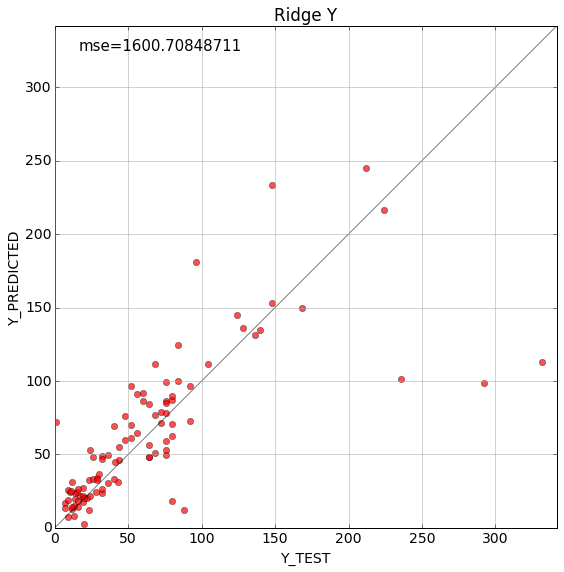

[  1.99773273e-01  -1.33046033e-02   1.66625186e+00   2.73973087e-05
   1.18034992e-01   1.11484146e-01  -1.50163369e-03]


In [537]:
y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    model = Ridge(alpha=best_alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test[0])
    y_predicted.append(y_pred[0])
    y_true.append(y_test[0])

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="Ridge Y", text=str(mse))
print model.coef_

Теперь логарифм

In [538]:
alpha = [0.01, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 2e5, 4e5, 8e5, 1e6, 2e6, 4e6, 7e6, 1e7, 1e8]

mse = []
for al in alpha:
    y_predicted = []
    y_true = []

    for train_index, test_index in loo:
        x_train, x_test, y_train, y_test = split_data(train_index, test_index)
        model = Ridge(alpha=al)
        model.fit(x_train, np.log(y_train))
        y_pred = model.predict(x_test[0])
        y_predicted.append(np.exp(y_pred[0]))
        y_true.append(y_test[0])

    cur_mse = mean_squared_error(y_true, y_predicted)
    print cur_mse
    mse.append(cur_mse)


best_alpha = alpha[mse.index(min(mse))]
print "Best Aplha = ", best_alpha
#plot(y_true, y_predicted, title="DecisionTree Log(Y)")

4418.85284724
4418.73217465
4417.52956231
4405.89405203
4315.16591742
3874.70964993
2825.63788494
2490.60755453
2459.73928809
2429.97775135
2410.94229718
2410.16341918
2429.69702335
2475.36731184
2518.66359757
2545.02598424
2646.40796337
Best Aplha =  1000000.0


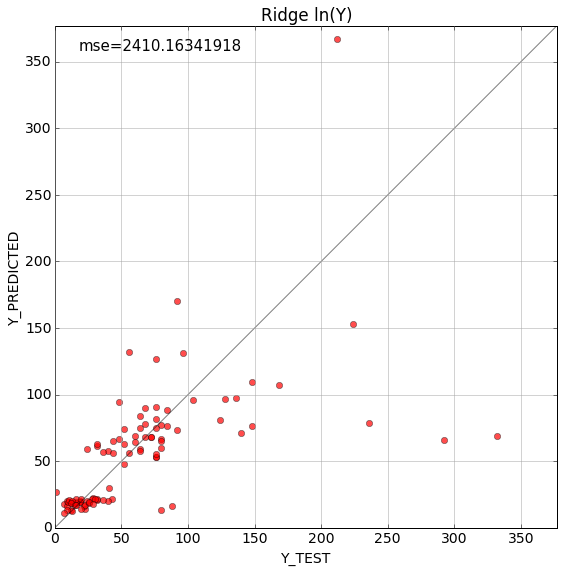

[ -7.07138510e-06   3.33988248e-04   1.51311713e-04   1.56440085e-06
   4.51133281e-04   7.35236386e-04   2.62009101e-06]


In [539]:
y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    model = Ridge(alpha=best_alpha)
    model.fit(x_train, np.log(y_train))
    y_pred = model.predict(x_test[0])
    y_predicted.append(np.exp(y_pred[0]))
    y_true.append(y_test[0])
    
mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="Ridge ln(Y)", text=str(mse))
print model.coef_

# RandomForest 

In [540]:
from sklearn.ensemble import RandomForestRegressor

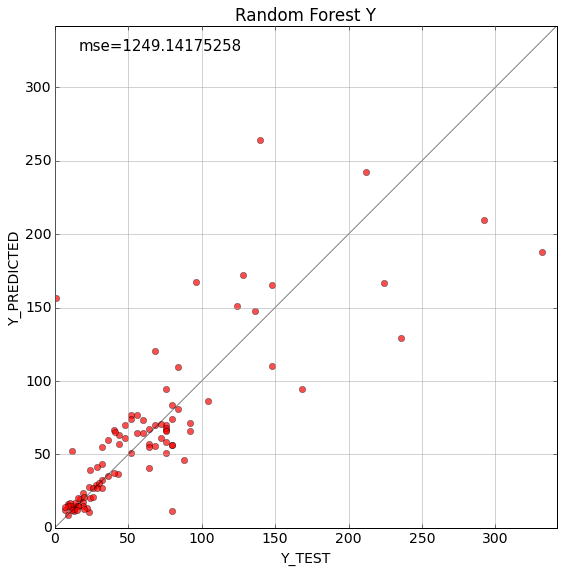

In [541]:
y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    model = RandomForestRegressor(n_estimators=20)
    model.fit(x_train, (y_train))
    y_pred = model.predict(x_test[0])
    y_predicted.append((y_pred[0]))
    y_true.append(y_test[0])

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="Random Forest Y", text=str(mse))

#### Теперь логарифм

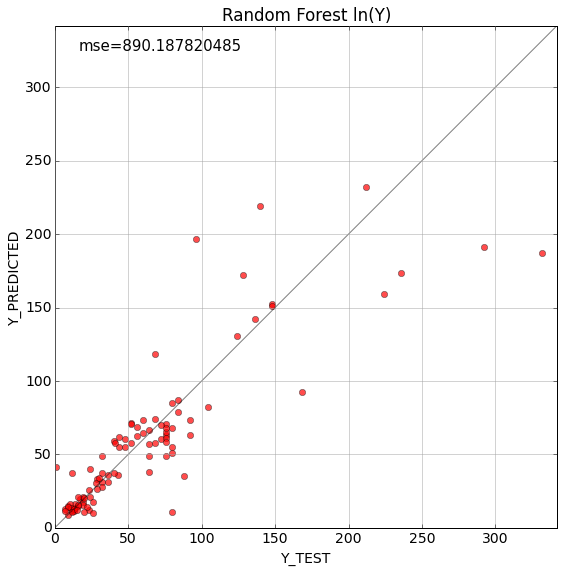

In [542]:
y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    model = RandomForestRegressor(n_estimators=700)
    model.fit(x_train, np.log(y_train))
    y_pred = model.predict(x_test[0])
    y_predicted.append(np.exp(y_pred[0]))
    y_true.append(y_test[0])

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="Random Forest ln(Y)", text=str(mse))

In [543]:
predic = pd.Series(np.around(y_predicted))
df["predicted"]=predic
d = df.sort_values("last_time_tweet", ascending=False)
d[["url", "last_time_tweet", "predicted"]].head(20)

,url,last_time_tweet,predicted
38,https://tjournal.ru/p/condomchallenge,332,187
47,https://tjournal.ru/p/automate-everything,292,191
18,https://tjournal.ru/p/rkn-no-enemy-of-the-state,236,174
2,https://tjournal.ru/p/papa-rap,224,159
49,https://tjournal.ru/p/fuboy-epic-trolling,212,232
13,https://tjournal.ru/p/telegram-music-bot,168,93
34,https://tjournal.ru/p/estonia-li-fi,148,153
52,https://tjournal.ru/p/life-in-internet-cafe,148,151
16,https://tjournal.ru/p/wordseye,140,219
10,https://tjournal.ru/p/igil-to-daesh,136,142


## Проверка

In [381]:
df = pd.read_csv(PREPARED_CSV, sep=",")
df = df[["url", "week_day_news", "minutes_since_midnight", "first_time_tweet","follower_sum", "retweeted_count_sum", "favorite_count_sum", "user_listed_count_sum", "last_time_tweet", "views", "comments"]]
df = df.drop_duplicates().dropna()
df = df.reset_index()

In [382]:
ltt = df["last_time_tweet"].as_matrix()
comments = df["comments"].as_matrix()
views = df["views"].as_matrix()

In [335]:
np.corrcoef(views, ltt)

array([[ 1.        ,  0.28986208],
       [ 0.28986208,  1.        ]])

In [336]:
np.corrcoef(comments, ltt)

array([[ 1.       ,  0.2135017],
       [ 0.2135017,  1.       ]])

In [337]:
np.corrcoef(views, comments)

array([[ 1.        ,  0.42986489],
       [ 0.42986489,  1.        ]])

In [317]:
m = np.mean(comments)

In [318]:
np.corrcoef(views*np.exp(comments*0.5/m), ltt)

array([[ 1.        ,  0.30427972],
       [ 0.30427972,  1.        ]])

In [333]:
df = pd.read_csv(PREPARED_CSV, sep=",")
df = df[["url", "week_day_news", "minutes_since_midnight", "first_time_tweet","follower_sum", "retweeted_count_sum", "favorite_count_sum", "user_listed_count_sum", "last_time_tweet", "views", "comments"]]
df = df.drop_duplicates().dropna()
df = df.reset_index()
ltt = df["last_time_tweet"].as_matrix()
comments = df["comments"].as_matrix()
views = df["views"].as_matrix()

In [367]:
def plot(y_test, y_predicted, labelX, labelY):
    plt.figure(figsize=(9,9))
    plt.plot(y_test, y_predicted, 'ro', label="predicted", alpha=0.7)
    #plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)

    #max_y = max(max(y_true), max(y_predicted))+10

    #plt.xlim(0, max_y)
    #plt.ylim(0, max_y)
    plt.xscale('log')
    plt.yscale('log')
    #plt.legend()
    #plt.text(0.05*max_y, max_y-0.05*max_y, "mse="+text, fontsize=15)

    #plt.plot([0, max_y], [0, max_y], color='black', alpha=0.5)
    #plt.grid(b=True, which='both', color='0.65',linestyle='-')

    plt.show()

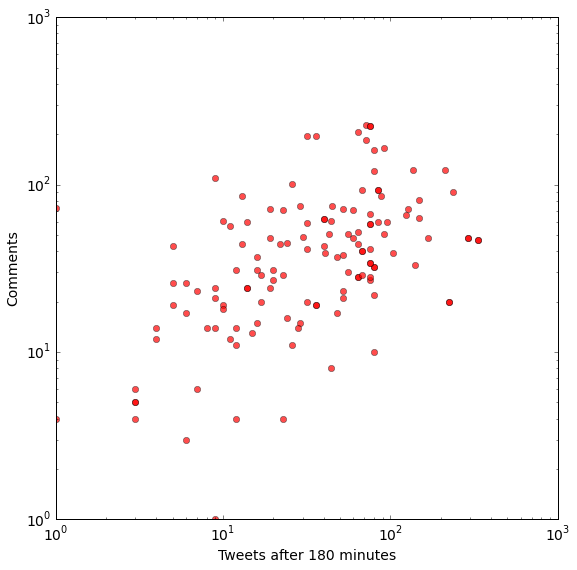

In [368]:
plot(ltt, comments, "Tweets after 180 minutes", "Comments")

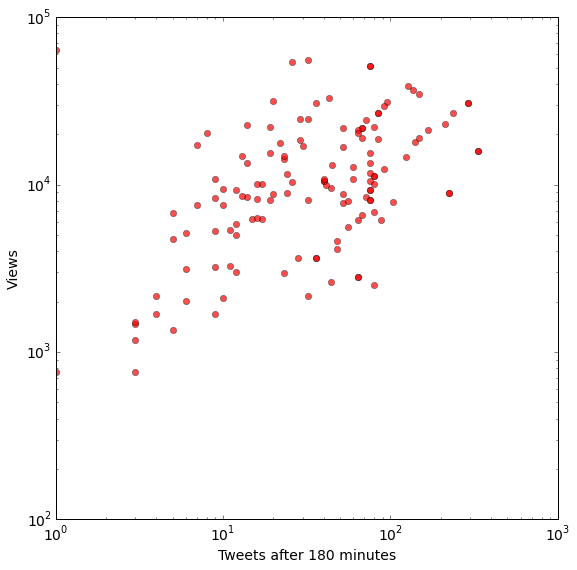

In [362]:
#plot(ltt, views, "Tweets after 180 minutes", "Views")
plt.figure(figsize=(9,9))
plt.plot(ltt, views, 'ro', label="predicted", alpha=0.7)
#plt.title(title)
plt.xlabel("Tweets after 180 minutes")
plt.ylabel("Views")
plt.xscale('log')
plt.yscale('log')
#max_y = max(max(y_true), max(y_predicted))+10
#plt.xlim(0, max_y)
#plt.ylim(0, max_y)
#plt.legend()
#plt.text(0.05*max_y, max_y-0.05*max_y, "mse="+text, fontsize=15)

#plt.plot([0, max_y], [0, max_y], color='black', alpha=0.5)
#plt.grid(b=True, which='both', color='0.65',linestyle='-')

plt.show()

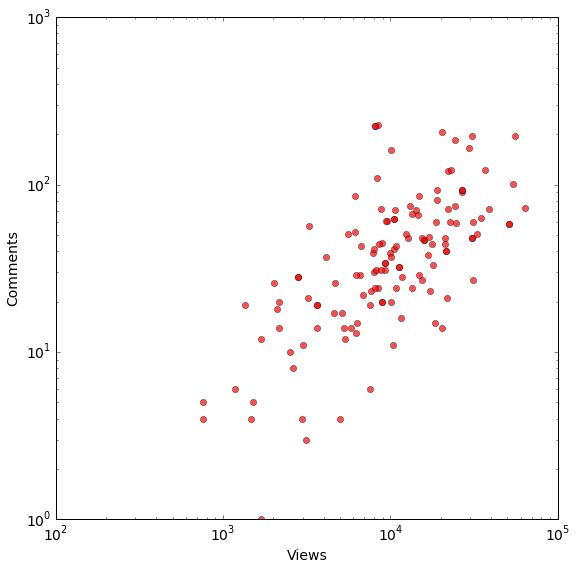

In [361]:
#plot(views, comments, "Views", "Comments")
#plot(ltt, views, "Tweets after 180 minutes", "Views")
plt.figure(figsize=(9,9))
plt.plot(views, comments, 'ro', label="predicted", alpha=0.7)
#plt.title(title)
plt.xlabel("Views")
plt.ylabel("Comments")
plt.xscale('log')
plt.yscale('log')
#max_y = max(max(y_true), max(y_predicted))+10
#plt.xlim(0, max_y)
#plt.ylim(0, max_y)
#plt.legend()
#plt.text(0.05*max_y, max_y-0.05*max_y, "mse="+text, fontsize=15)

#plt.plot([0, max_y], [0, max_y], color='black', alpha=0.5)
#plt.grid(b=True, which='both', color='0.65',linestyle='-')

plt.show()